In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
import plotly.graph_objects as go

# Read csv file and format it

In [2]:
df = pd.read_csv("~/.local/share/survey/data.txt")
df.columns = ["timestamp", "mode", "count"]

In [3]:
df.head()

,timestamp,mode,count
0,1706518533,150,129330
1,1706518642,150,129480
2,1706518728,150,129630
3,1706518841,150,129780
4,1706518959,150,129930


In [4]:
df["date"] = df["timestamp"].apply(dt.datetime.fromtimestamp)
df.head()

,timestamp,mode,count,date
0,1706518533,150,129330,2024-01-29 09:55:33
1,1706518642,150,129480,2024-01-29 09:57:22
2,1706518728,150,129630,2024-01-29 09:58:48
3,1706518841,150,129780,2024-01-29 10:00:41
4,1706518959,150,129930,2024-01-29 10:02:39


In [12]:
df2 = pd.DataFrame(df["mode"].groupby(df["date"].dt.date).sum())
df2["time"] = pd.to_datetime(df2["mode"], unit = 's')
df2.head()


,mode,delta,time
date,,,
2024-01-29,35000,0 days 09:43:20,1970-01-01 09:43:20
2024-01-31,180,0 days 00:03:00,1970-01-01 00:03:00
2024-02-02,9720,0 days 02:42:00,1970-01-01 02:42:00
2024-02-03,24450,0 days 06:47:30,1970-01-01 06:47:30
2024-02-04,27840,0 days 07:44:00,1970-01-01 07:44:00


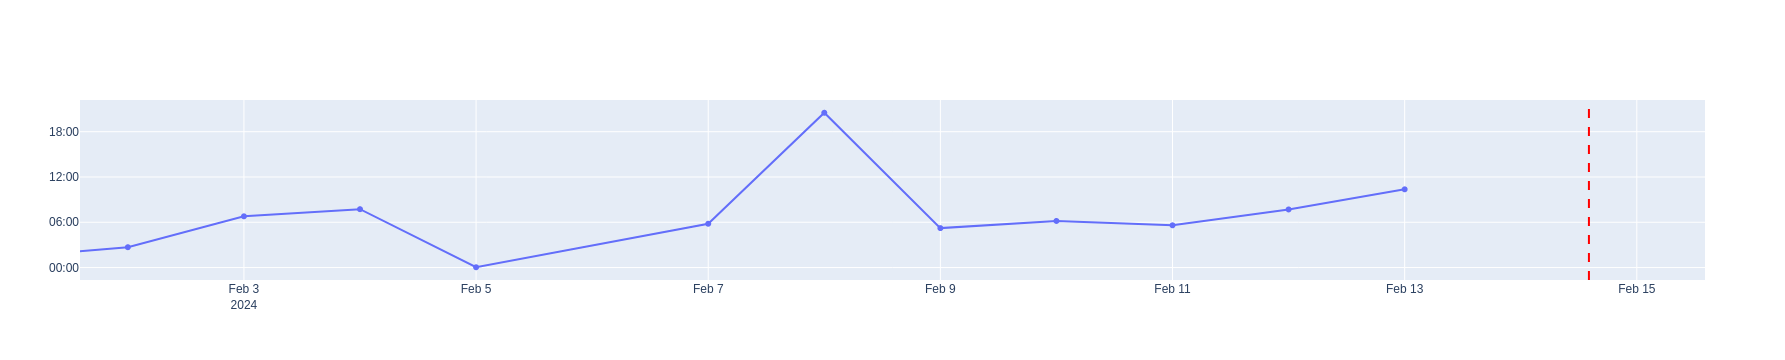

In [23]:
fig = go.Figure([go.Scatter(x=df2.index, y=df2["time"])])
fig.update_layout(yaxis_tickformat='%H:%M')
fig.update_xaxes(type="date", range=[dt.datetime.today().replace(day=1), dt.datetime.today() + dt.timedelta(days = 1)])
fig.add_vline(x = dt.datetime.today(), line_dash="dash", line_color="red")
fig.show()

/nix/store/llp7y1bnlw93w0a8qdpkx0gza5gmrs07-python3-3.11.6-env/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



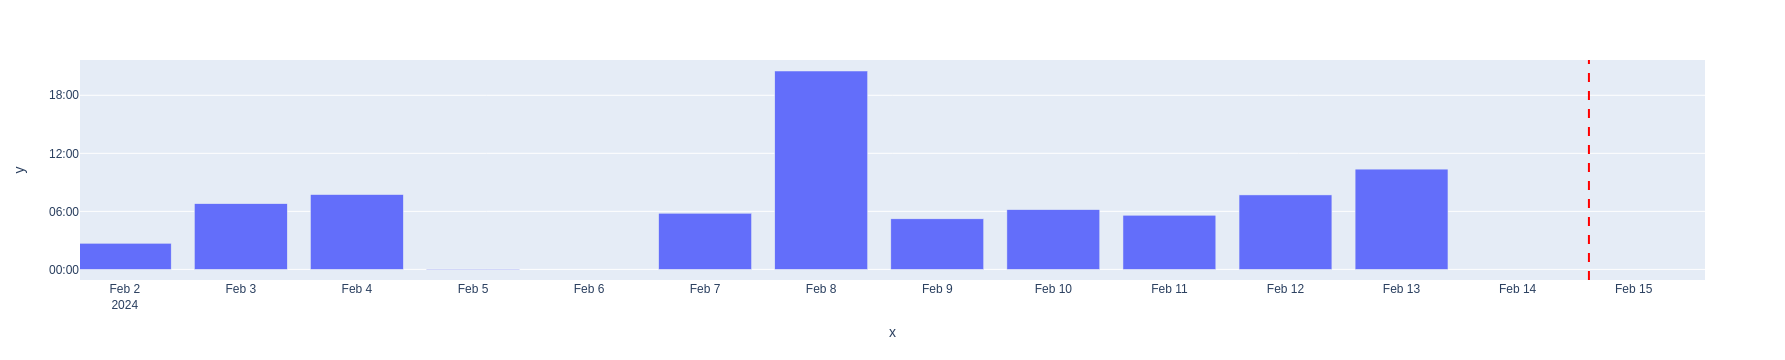

In [45]:
import plotly.express as px
fig = px.bar(y = df2["time"], x = df2.index)
fig.update_layout(yaxis_tickformat='%H:%M')
fig.update_xaxes(type="date", range=[dt.datetime.today().replace(day=1), dt.datetime.today() + dt.timedelta(days = 1)], tickmode = "linear")
fig.add_vline(x = dt.datetime.today(), line_dash="dash", line_color="red")
fig.show()

# Evaluate seconds worked each day in the current month

In [9]:
df_month = df[df["date"].apply(lambda x: x.month == dt.datetime.now().month)]
df_day = df_month.copy()
df_day["day"] = df_day["date"].apply(lambda x: x.day)
df_day.head()

,timestamp,mode,count,date,day
205,1706862001,180,164540,2024-02-02 09:20:01,2
206,1706862075,180,164720,2024-02-02 09:21:15,2
207,1706862165,180,164900,2024-02-02 09:22:45,2
208,1706862205,180,165080,2024-02-02 09:23:25,2
209,1706862251,180,165260,2024-02-02 09:24:11,2


In [6]:
df2 = pd.DataFrame(df_day["mode"].groupby(df_day["day"]).sum())
df2.head()

,mode
day,
2,9720
3,24450
4,27840
5,150
7,20900


In [7]:
def format_func(x, pos):
    hours = int(x//3600)
    minutes = int((x%3600)//60)
    seconds = int(x%60)

    return "{:d}:{:02d}".format(hours, minutes)
    # return "{:d}:{:02d}:{:02d}".format(hours, minutes, seconds)

formatter = ticker.FuncFormatter(format_func)

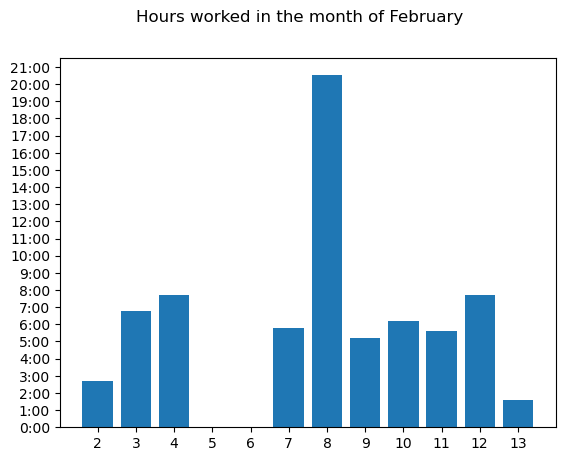

In [8]:
f = plt.figure()
ax = f.add_subplot(1,1,1)
ax.bar(df2.index, df2["mode"])

f.suptitle("Hours worked in the month of " + dt.datetime.now().strftime("%B"))
ax.yaxis.set_major_formatter(formatter)
# this locates y-ticks at the hours
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=3600))
# this ensures each bar has a 'date' label
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))

In [24]:
plt.savefig(os.path.expanduser("~/.local/share/survey/images/hour_month.png"))

<Figure size 640x480 with 0 Axes>